# Perplexity query

```
Using python and sklearn: please illustrate the K nearest neighbors model. Create a dataset with two features and two classes. Plot the decision boundary for a range of choices of k
```

In [1]:
%matplotlib inline

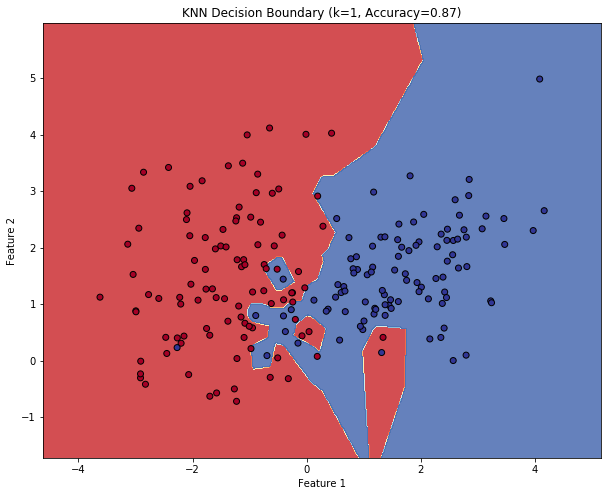

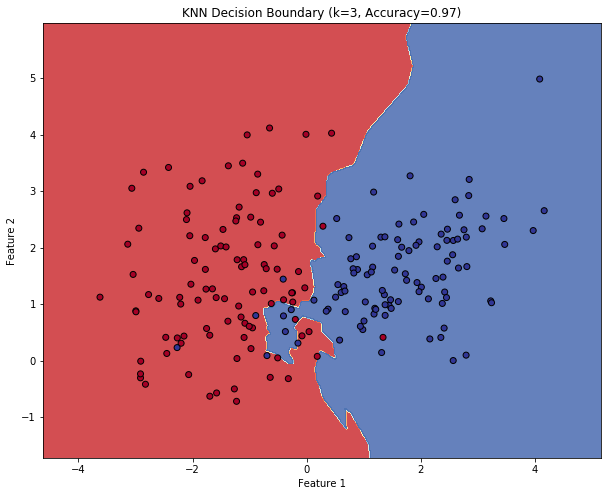

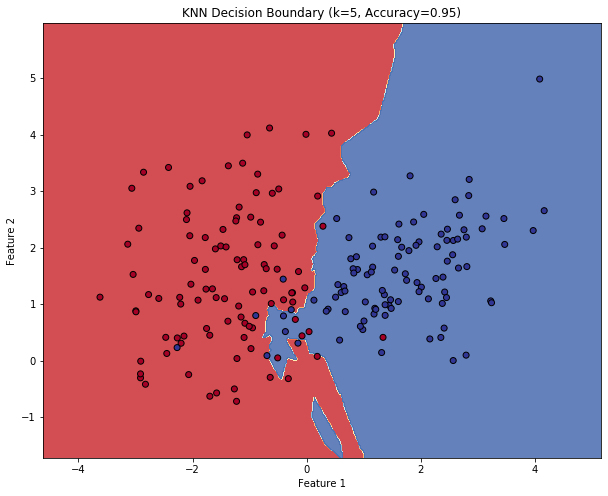

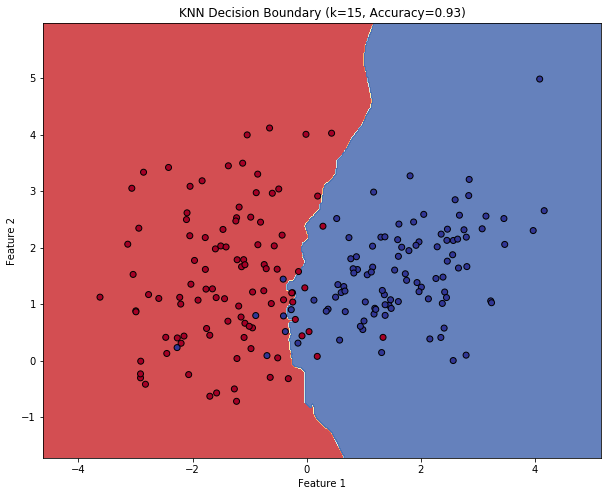

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Generate a sample dataset
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, 
                           class_sep=1.5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# List of k values to try
k_values = [1, 3, 5, 15]

# Plot decision boundaries for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    accuracy = knn.score(X_test, y_test)
    plot_decision_boundary(X, y, knn, f'KNN Decision Boundary (k={k}, Accuracy={accuracy:.2f})')